# Explore Mental Health Data

In this notebook, we will explore various aspects of mental health data, including statistical analysis, and machine learning techniques for predicing depression.


In [11]:
import pandas as pd
import numpy as np

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 0)          # auto-detect wide console
pd.set_option("display.max_colwidth", None)

In [12]:
df = pd.read_csv('../data/train.csv')
df.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,NaN,5.0,NaN,NaN,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,NaN,3.0,NaN,NaN,4.0,7-8 hours,Unhealthy,B.Pharm,No,10.0,3.0,Yes,0
8,8,Aishwarya,Female,24.0,Bangalore,Student,NaN,2.0,NaN,5.90,5.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,NaN,4.0,NaN,NaN,1.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0


## Basic Data Exploration

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

What these column names tell us:
* Demographics:
    - `Age`, `Gender`, `City` -> baseline characteristics.
    - `Working Professional` or `Student`, `Profession`, `Degree` -> Context about their life stage.
* Psychological Stressors:
    - `Academic Pressure`, `Work Pressure`, `Financial Stress` -> Direct stress factors.
* Well-being indicators:
    - `Study Satisfaction`, `Job Satisfaction`, `Financial Well-being` -> Overall life satisfaction metrics.
* Clinical Risk Factors:
    - `Depression`, `Have you ever had suicidal thoughts?`, `Family History of Mental Illness` -> Indicators of mental health risks.
* Performance Proxy:
    - `CGPA` -> (for Students Academic Performance indicator)
* Engagement Proxy:
    -  `Work/Study Hours` -> Engagement Indicator

In [14]:
print(f"Number of rows in the dataframe: {df.shape[0]}")
print(f"Number of columns in the dataframe: {df.shape[1]}")

Number of rows in the dataframe: 140700
Number of columns in the dataframe: 20


In [15]:
# Fix the data types
df['id'] = df['id'].astype(str)
df['Age'] = df['Age'].astype(int)

In [16]:
numeric_cols = ['Age', 'Academic Pressure', 'Work Pressure',
                 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
                 'Work/Study Hours', 'Financial Stress']
categorical_cols = ['Gender', 'City', 'Working Professional or Student',
                     'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree',
                     'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

In [17]:
df[numeric_cols].describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress
count,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000
mean,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983
std,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633
min,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000
25%,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000
50%,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000
75%,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000
max,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000


In [18]:
df[categorical_cols].describe(include='object')

,Gender,City,Working Professional or Student,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
count,140700,140700,140700,104070,140700,140696,140698,140700,140700
unique,2,98,2,64,36,23,115,2,2
top,Male,Kalyan,Working Professional,Teacher,Less than 5 hours,Moderate,Class 12,No,No
freq,77464,6591,112799,24906,38784,49705,14729,71138,70758


### Target variable exploration

In [19]:
print("Class Distribution")
counts = df['Depression'].value_counts()
display(pd.DataFrame({'Count': counts}))

Class Distribution


,Count
Depression,
0,115133
1,25567


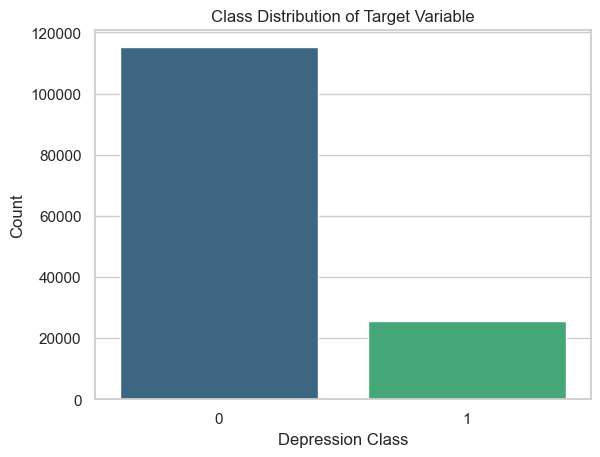

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid')
# Bar Chart
sns.barplot(
    x=counts.index,
    y=counts.values,
    palette='viridis'
)

plt.title('Class Distribution of Target Variable')
plt.xlabel('Depression Class')
plt.ylabel('Count')
plt.show()

There's a huge imbalance on Target Variable

#### Target Variable Correlation

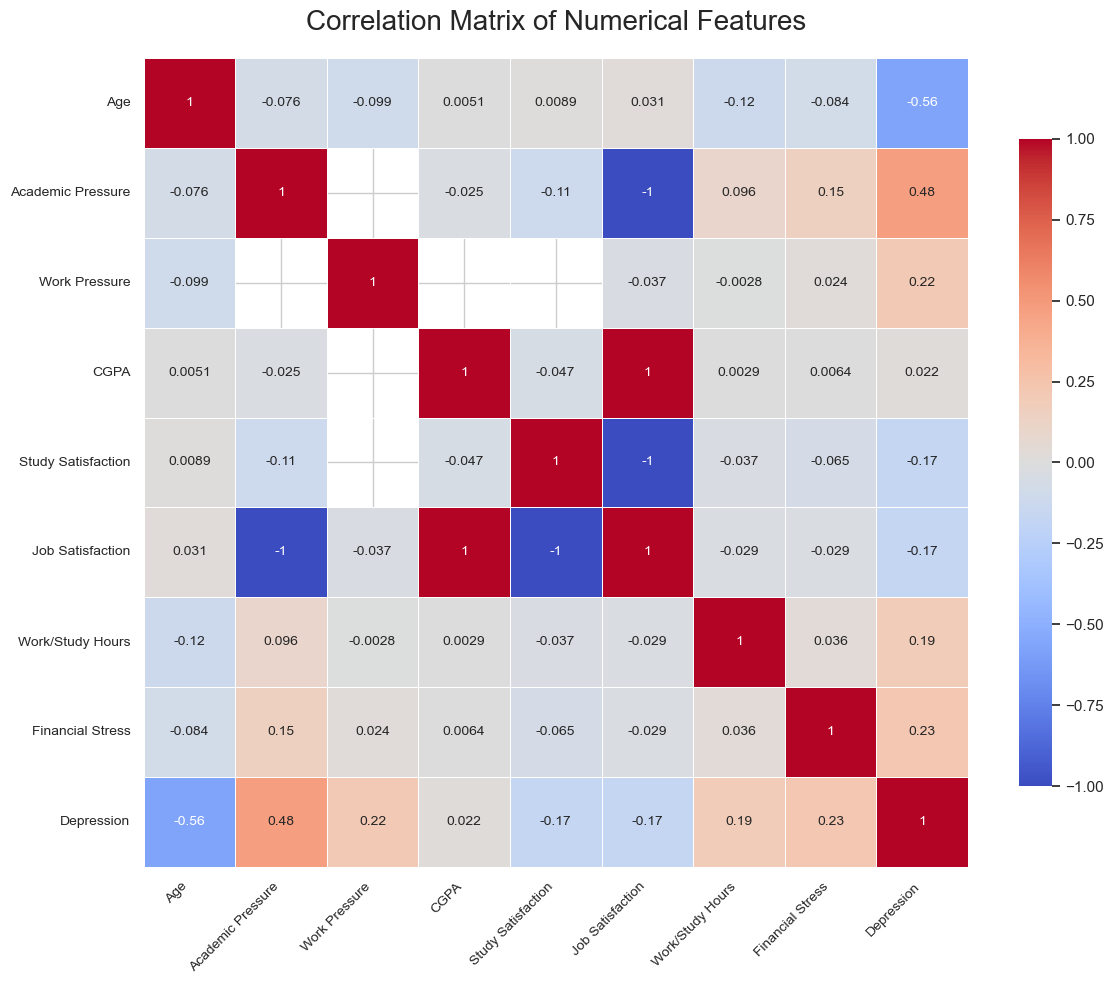

In [ ]:
# Correlation matrix on numerical features
corr = df[numeric_cols + ['Depression']].corr()
depression_correlations = corr['Depression'].sort_values(ascending=False)
depression_correlations = depression_correlations.drop('Depression')

import seaborn as sns
import matplotlib.pyplot as plt
# Visualize the correlation
plt.figure(figsize=(12,10))

sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    vmin=-1, vmax=1,
    linewidths=0.5,
    annot_kws={"size": 10},
    cbar_kws={"shrink": 0.8}
)
plt.title('Correlation Matrix of Numerical Features', fontsize=20, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

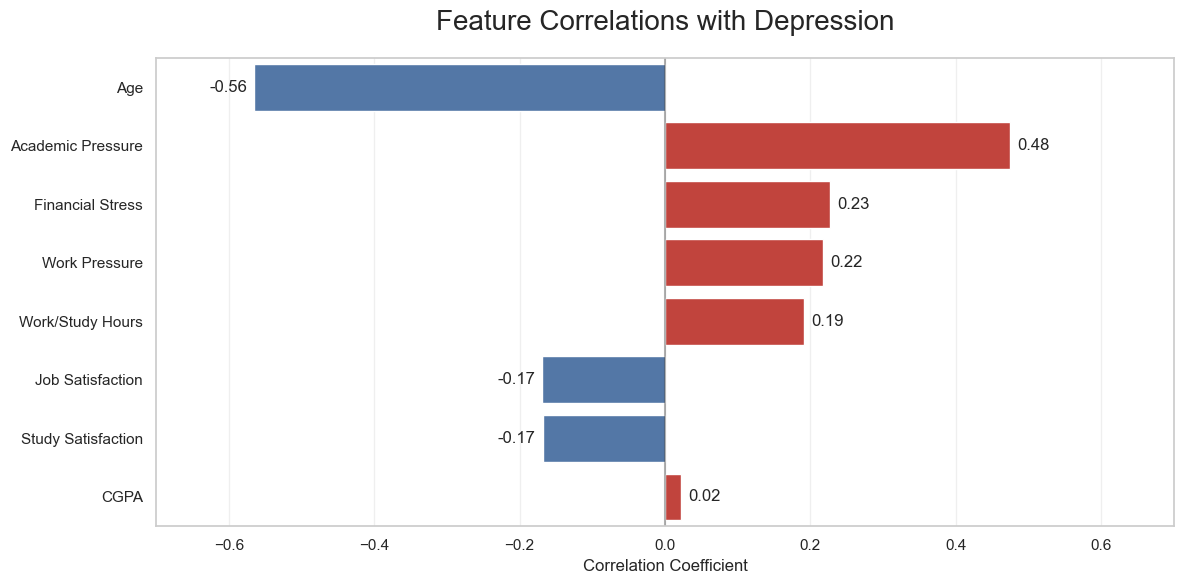

In [ ]:
# Create a focused bar chart for Depression Correlation
plt.figure(figsize=(12,6))
sns.set_color_codes("pastel")

# Sort by absolute value to see the strongest correlations
depression_correlations_abs = depression_correlations.reindex(
    depression_correlations.abs().sort_values(ascending=False).index
)

# Create horizontal bar chart with custom colors
bars = sns.barplot(
    x=depression_correlations_abs.values,
    y=depression_correlations_abs.index,
    palette=['#d73027' if x > 0 else '#4575b4' for x in depression_correlations_abs.values],
    orient='h'
)

# Add value labels to the bars
for i, v in enumerate(depression_correlations_abs.values):
    bars.text(
        v + (0.01 if v >= 0 else -0.01),
        i,
        f'{v:.2f}',
        ha='left' if v >= 0 else 'right',
        va='center'
    )

# Add a veritical line at x=0
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)

# Improve appearance
plt.title('Feature Correlations with Depression', fontsize=20, pad=20)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('')
plt.xlim(-0.7, 0.7)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


1. `Age` shows the strongest correlation (-0.56), which is negative. This indicates that younger individuals in your dataset tend to have higher depression scores, while older individuals tend to have lower depression scores.
2. `Academic Pressure` has the second strongest correlation (0.48), which is positive. This suggests that higher academic pressure is associated with higher depression level.s
3. `Financial Stress` (0.23) and `Work Pressure` (0.22) show moderate positive correlations with depression, indicating these stressors are associated with increased depression levels.
4. `Work/Study Hours` (0.19) also shows a positive correlation, suggesting longer hours might be linked to higher depression scores.
5. Both `Job Satisfcation` and `Study Satisfcation` show identical negative correlations (-0.17), meaning higher satisfaction in these areas is associated with lower depression levels.
6. `CGPA` has almost no correlation (0.02) with depression in the dataset, suggesting academic preformance may not be directly related to depression levels.

## Chi-Square Analysis for Mental Health Data

### If there's a relationship between `Gender` and `Depression` in the dataset:

In [ ]:
# Create a simple contingency table
contingency = pd.crosstab(df['Gender'], df['Depression'])
print('Contingency Table (Observed Frequencies):')
display(contingency)

Contingency Table (Observed Frequencies):


Depression,0,1
Gender,,
Female,51965,11271
Male,63168,14296


In [ ]:
import scipy.stats as stats
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

# Run the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency)
# Print results in a readable format
print(f"\nChi-square statistic: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"Significant relationship exists: {'Yes' if p_value < 0.05 else 'No'}")


Chi-square statistic: 9.2895
p-value: 0.0023
Degrees of freedom: 1
Significant relationship exists: Yes


### Try with multiple variables

In [ ]:
# Test each categorical column against Depression
for fe in categorical_cols:
    print(f"\nTesting {fe} vs Depression")

    # Create contingency table
    cont_table = pd.crosstab(df[fe], df['Depression'])

    # Run chi-square test
    chi2, p, dof, expected = chi2_contingency(cont_table)

    # Print simple results
    print(f"Chi-Square value: {chi2:.4f}")
    print(f"p-value: {p:.4f}")
    print(f"Significant: {'Yes' if p_value < 0.05 else 'No'}")


Testing Gender vs Depression
Chi-Square value: 9.2895
p-value: 0.0023
Significant: Yes

Testing City vs Depression
Chi-Square value: 1124.3966
p-value: 0.0000
Significant: Yes

Testing Working Professional or Student vs Depression
Chi-Square value: 38157.5858
p-value: 0.0000
Significant: Yes

Testing Profession vs Depression
Chi-Square value: 1423.7426
p-value: 0.0000
Significant: Yes

Testing Sleep Duration vs Depression
Chi-Square value: 1230.3089
p-value: 0.0000
Significant: Yes

Testing Dietary Habits vs Depression
Chi-Square value: 3270.1072
p-value: 0.0000
Significant: Yes

Testing Degree vs Depression
Chi-Square value: 13173.2227
p-value: 0.0000
Significant: Yes

Testing Have you ever had suicidal thoughts ? vs Depression
Chi-Square value: 17142.0554
p-value: 0.0000
Significant: Yes

Testing Family History of Mental Illness vs Depression
Chi-Square value: 38.2273
p-value: 0.0000
Significant: Yes


1. All categorical variables show significant relationships with depression (p < 0.05), indicating they all have some association with depression levels.
2. Strength of associations varies dramatically (based on chi-square values):
    - Extremely strong associations:
        - `Working Professional or Student`
        - `Have you ever had suicidal thoughts?`
        - `Degree`
    - Strong asociations:
        - `Dietary Habits`
        - `Profession`
        - `Sleep Duration`
        - `City`
    - Weaker associations:
        - `Gender`
        - `Family History of Mental Illness`

- Occupation and Education status

The strongest relationship exists between depression and whether someone is a working professional or student. This suggests that life stage and associated stressors may be critical determinations of depression risk
- Suicidal thoughts

Very strong association between depression and suicidal thoughts confirms the clinical relationship between these mental health indicators, suggesting they may share common underlying factors.

- Education Level

The high chi-square value for `Degree` suggests that education level significantly relates to depression prevalence, possibly due to difference stressors, socioeconmic factors, or lifestyle patterns associated with different education levels.

- Lifestyle factors

Both `Diet Habits` and `Sleep Duration` show strong associations with depression highlighting the importance of lifestyle factors in mental health outcomes.

- Geographic Variation

Relationship with `City` suggest that location-specific factors (environmental, cultural, socioeconomic) may influence depression rates.

- Demographic Factors

while `Gender` shows a statistically significant relationship, its relatively lower chi-square value suggests gender may play a less prominent role compared to other factors in this dataset.

- Genetic Component

The relationship with `Family History of Mental Illness` confirms that hereditary factors may influence depression, though other factors in this dataset appear to have stronger associations.

In [ ]:
depression_map = {1: 'True', 0: 'False'}
df_test = df.copy()
df_test['Depression'] = df_test['Depression'].map(depression_map)

## How does Occupation, Education status influence depression levels?

In [ ]:
# Create a contingency table for Working Professional or Student feature
work_edu_depression = pd.crosstab(
    df['Working Professional or Student'],
    df['Depression'],
    normalize='index' # convert to percentages by row
)

# Display the contingency table
display(work_edu_depression)

Depression,0,1
Working Professional or Student,,
Student,0.414501,0.585499
Working Professional,0.918164,0.081836


<Figure size 1000x600 with 0 Axes>

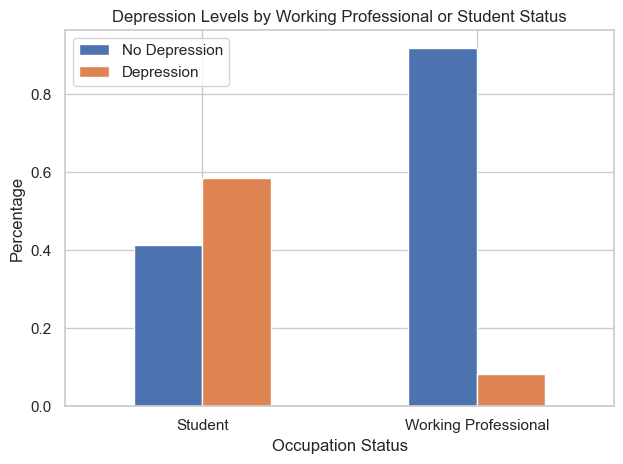

In [ ]:
# visualize the relationship
plt.figure(figsize=(10,6))
work_edu_depression.plot(kind='bar', stacked=False)
plt.title('Depression Levels by Working Professional or Student Status')
plt.xlabel('Occupation Status')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(['No Depression', 'Depression'])
plt.tight_layout()
plt.show()

Depression,0,1
Profession,,
Moderate,0.000000,1.000000
Yogesh,0.333333,0.666667
Unemployed,0.666667,0.333333
Graphic Designer,0.814273,0.185727
Judge,0.891355,0.108645
HR Manager,0.893088,0.106912
Mechanical Engineer,0.898895,0.101105
Architect,0.900915,0.099085
Financial Analyst,0.916773,0.083227


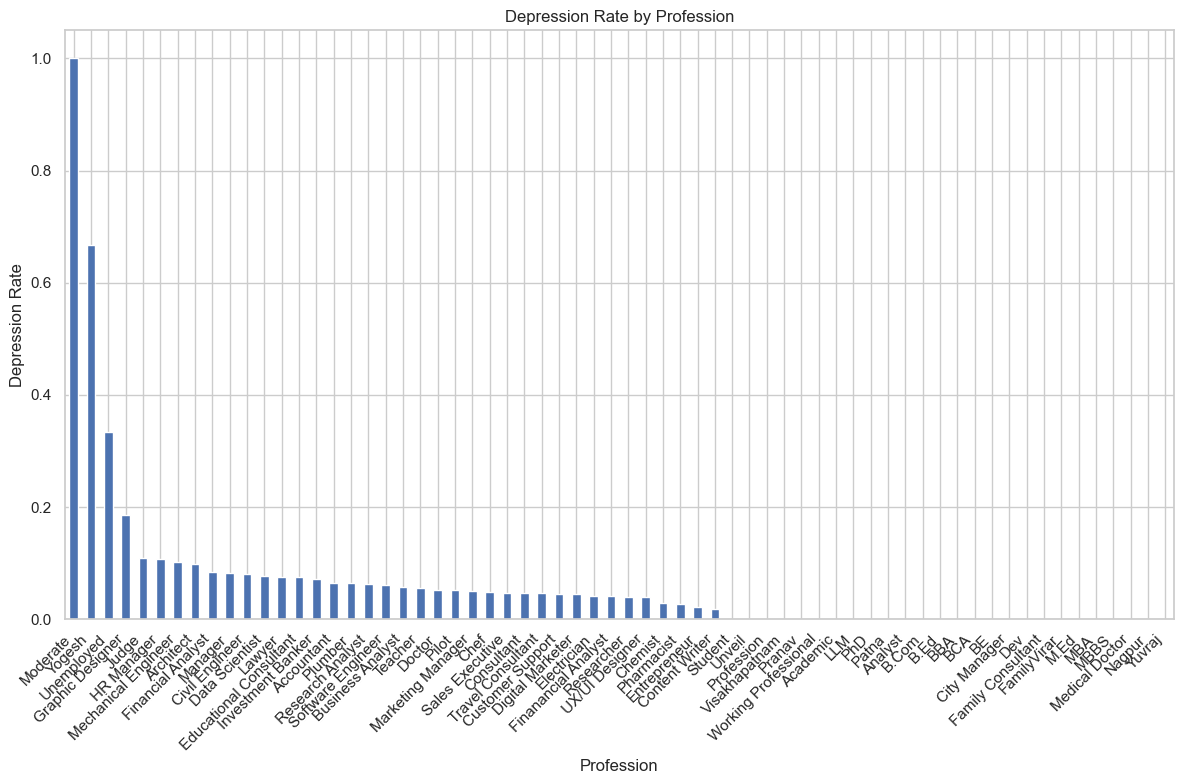

In [ ]:
# Fore more detailed analysis by profession
prof_depression = pd.crosstab(
    df['Profession'],
    df['Depression'],
    normalize='index'
).sort_values(by=1, ascending=False) # Sort by depression rate
display(prof_depression.head(10))

# Visualize
plt.figure(figsize=(12, 8))
prof_depression[1].plot(kind='bar')
plt.title('Depression Rate by Profession')
plt.xlabel('Profession')
plt.ylabel('Depression Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
display(df['Profession'].value_counts())

Profession
Teacher                   24906
Content Writer             7814
Architect                  4370
Consultant                 4229
HR Manager                 4022
Pharmacist                 3893
Doctor                     3255
Business Analyst           3161
Entrepreneur               2968
Chemist                    2967
Chef                       2862
Educational Consultant     2852
Data Scientist             2390
Researcher                 2328
Lawyer                     2212
Customer Support           2055
Marketing Manager          1976
Pilot                      1913
Travel Consultant          1860
Plumber                    1748
Sales Executive            1739
Manager                    1737
Judge                      1712
Electrician                1582
Financial Analyst          1574
Software Engineer          1510
Civil Engineer             1470
UX/UI Designer             1452
Digital Marketer           1372
Accountant                 1339
Finanancial Analyst        13

In [ ]:
# Count Moderate Yogesh
print(f"Number of Moderate/Yogesh: {df[(df['Profession'] == 'Moderate') | (df['Profession'] == 'Yogesh')].shape[0]}")

# Get the IDs of subjects
moderate_yogesh_ids = df[(df['Profession'] == 'Moderate') | (df['Profession'] == 'Yogesh')]['id'].tolist()

# use the ids as a mask to filter dataframe
df_filtered = df[df['id'].isin(moderate_yogesh_ids)]
display(df_filtered)

Number of Moderate/Yogesh: 4


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
12526,12526,Yogesh,Male,34,Indore,Working Professional,Yogesh,NaN,4.0,NaN,NaN,1.0,Less than 5 hours,Unhealthy,M.Com,Yes,10.0,3.0,Yes,1
28927,28927,Yogesh,Male,33,Agra,Working Professional,Yogesh,NaN,5.0,NaN,NaN,1.0,5-6 hours,Unhealthy,B.Ed,Yes,0.0,4.0,Yes,1
44829,44829,Yuvraj,Male,34,Varanasi,Working Professional,Yogesh,NaN,3.0,NaN,NaN,4.0,7-8 hours,Unhealthy,M.Ed,No,4.0,2.0,No,0
96534,96534,Garima,Female,22,Srinagar,Working Professional,Moderate,NaN,5.0,NaN,NaN,1.0,5-6 hours,Unhealthy,B.Com,Yes,10.0,3.0,No,1


## How does suicidal thoughts (critical risk factors matter)?

In [ ]:
risk_factors = ['Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

# Create a contingency table for risk factors
risk_fact_cont = pd.crosstab(
    [df[risk_factors[0]], df[risk_factors[1]]],
    df['Depression'],
    normalize='index'
)

display(risk_fact_cont)

Depression                                                                     0  \
Have you ever had suicidal thoughts ? Family History of Mental Illness             
No                                    No                                0.953050   
                                      Yes                               0.949680   
Yes                                   No                                0.690818   
                                      Yes                               0.673580   

Depression                                                                     1  
Have you ever had suicidal thoughts ? Family History of Mental Illness            
No                                    No                                0.046950  
                                      Yes                               0.050320  
Yes                                   No                                0.309182  
                                      Yes                               0.326420

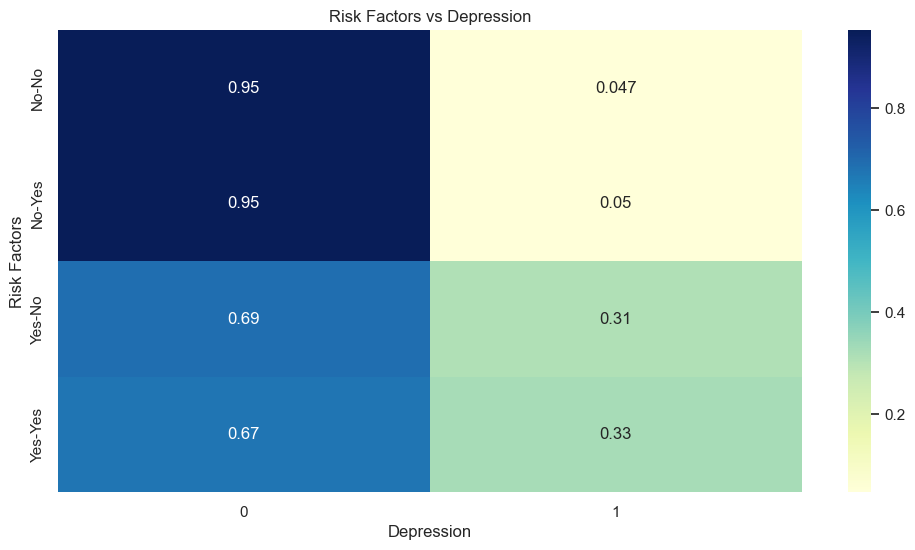

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(risk_fact_cont, annot=True, cmap='YlGnBu')
plt.title('Risk Factors vs Depression')
plt.xlabel('Depression')
plt.ylabel('Risk Factors')
plt.show()

<Figure size 1200x600 with 0 Axes>

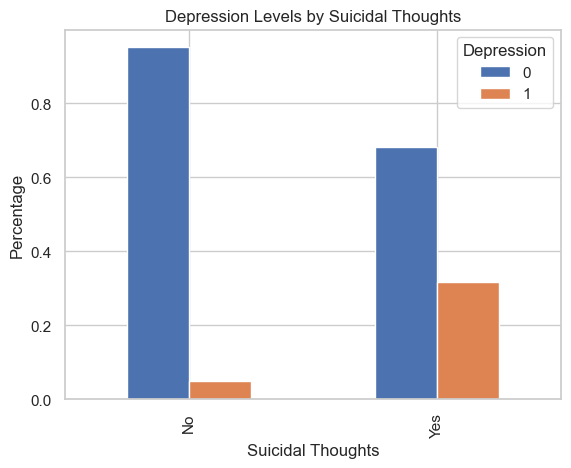

In [ ]:
thoughts_depressed = pd.crosstab(
    df['Have you ever had suicidal thoughts ?'],
    df['Depression'],
    normalize='index'
)

plt.figure(figsize=(12, 6))
thoughts_depressed.plot(kind='bar', stacked=False)
plt.title('Depression Levels by Suicidal Thoughts')
plt.xlabel('Suicidal Thoughts')
plt.ylabel('Percentage')
plt.show()

## How does Education level matter in Depression?

In [ ]:
edu_lvl_depression = pd.crosstab(
    df['Degree'],
    df['Depression'],
    normalize='index'
)

display(edu_lvl_depression)

Depression,0,1
Degree,,
0,0.000000,1.000000
20,0.000000,1.000000
24,0.000000,1.000000
29,1.000000,0.000000
5.56,1.000000,0.000000
5.61,1.000000,0.000000
5.88,1.000000,0.000000
7.06,1.000000,0.000000
8.56,0.000000,1.000000


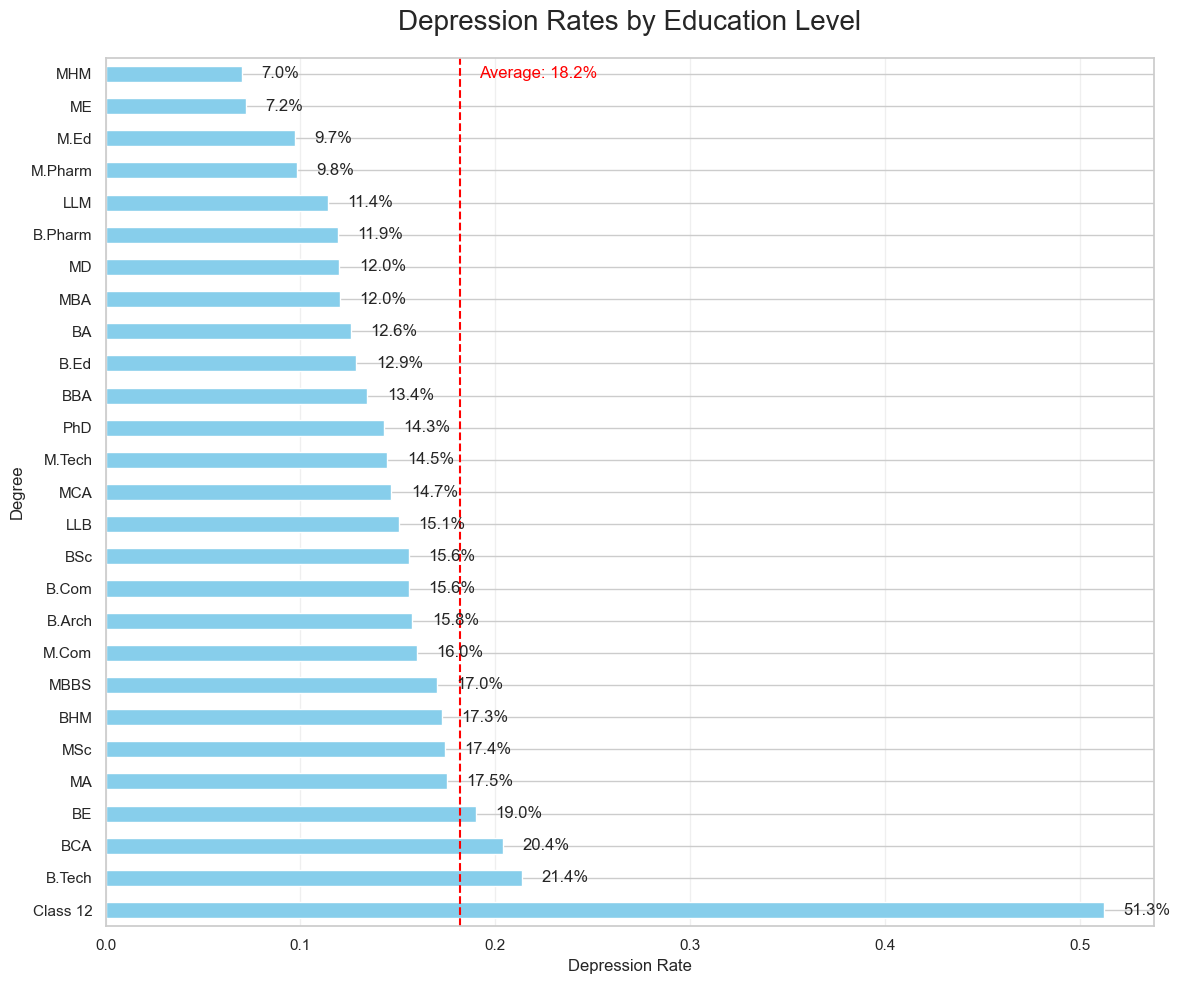

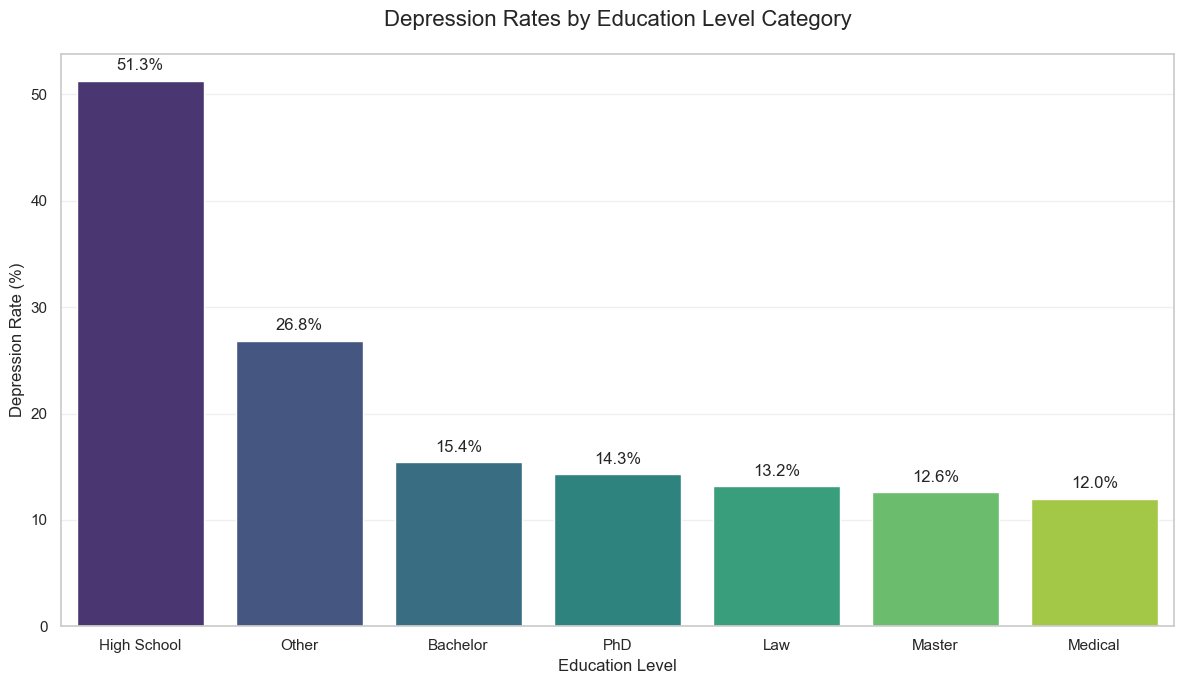

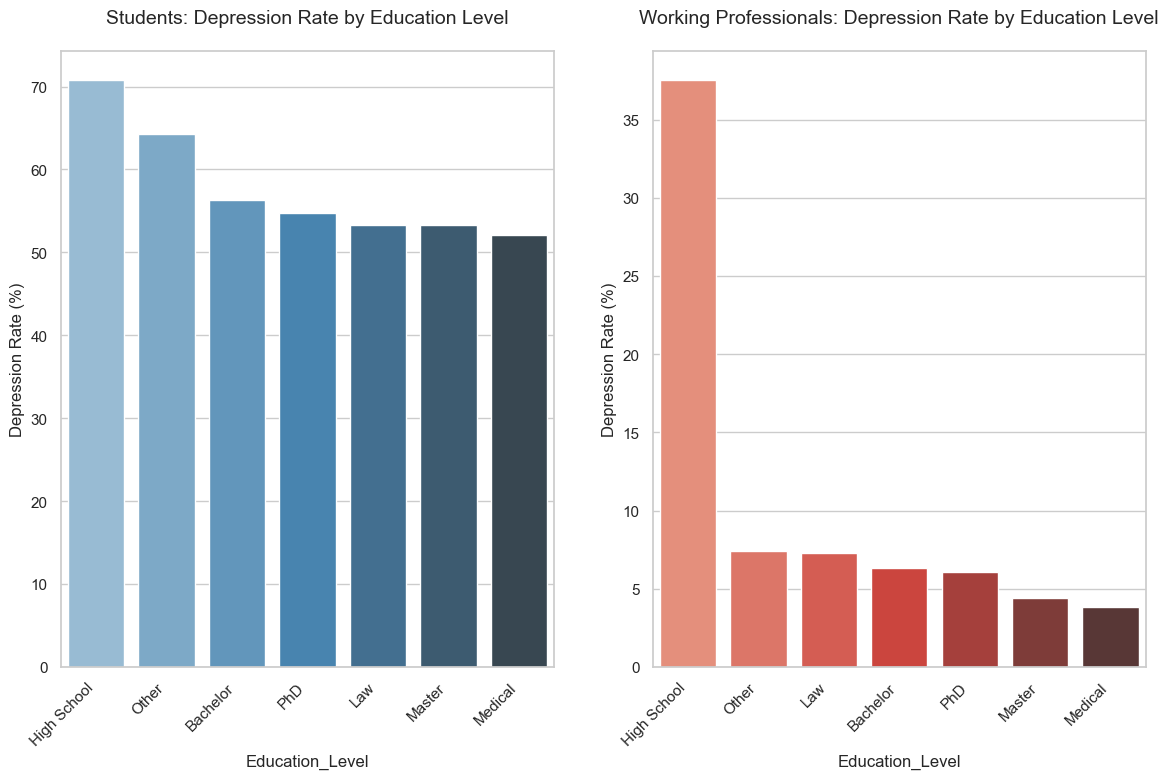

In [ ]:
# Sort the depression rates and filter to focus on mean.
# First, check how many entries we have for each degree.
degree_counts = df['Degree'].value_counts()

# Filter to degrees that have at least 10 entries for more reliable stats.
common_degrees = degree_counts[degree_counts >= 10].index.tolist()
filtered_edu_depression = edu_lvl_depression.loc[common_degrees].sort_values(by=1, ascending=False)

# Create a historical bar chart for better readability
plt.figure(figsize=(12,10))
ax = filtered_edu_depression[1].plot(kind='barh', color='skyblue')

# Add data labels to the bars
for i, v in enumerate(filtered_edu_depression[1]):
    ax.text(v + 0.01, i, f'{v:.1%}', va='center')

# Add a vertical line for the average depression rate
avg_depression = df['Depression'].mean()
plt.axvline(x=avg_depression, color='red', linestyle='--', label=f'Average Depression {avg_depression:.1%}')
plt.text(
    avg_depression + 0.01, len(filtered_edu_depression) - 1,
    f'Average: {avg_depression:.1%}', color='red', va='center'
)

# Improve the chart appearance
plt.title('Depression Rates by Education Level', fontsize=20, pad=20)
plt.xlabel('Depression Rate', fontsize=12)
plt.ylabel('Degree', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## Analyze by education level (Bachelor, Master, PhD, etc.)
# Create a simplified education level column

def categorize_degree(degree):
    degree = str(degree).lower()
    if any (x in degree for x in ['class 11', 'class 12']):
        return 'High School'
    elif any (x in degree for x in ['b.', 'ba', 'bs', 'be', 'bba', 'bca', 'bhm', 'bsc', 'btech', 'barch']):
        return 'Bachelor'
    elif any (x in degree for  x in ['m.', 'ma', 'ms', 'me', 'mba', 'mca', 'mhm', 'msc', 'mtech', 'march']):
        return 'Master'
    elif 'phd' in degree or 'doctor' in degree:
        return 'PhD'
    elif 'llb' in degree or 'llm' in degree:
        return 'Law'
    elif 'mbbs' in degree or 'md' in degree:
        return 'Medical'
    else:
        return 'Other'
    
# create a new column with categorized education levels
df_test['Education_Level'] = df_test['Degree'].apply(categorize_degree)

# Create a contingency table for these simplified education levels
edu_level_depression = pd.crosstab(
    df_test['Education_Level'],
    df_test['Depression'],
    normalize='index'
) * 100 # Convert to percentages

# Sort by depression rate
edu_level_depression_sorted = edu_level_depression.sort_values(by='True', ascending=False)

# Create bar chart for these categories
plt.figure(figsize=(12, 7))
bars = sns.barplot(
    x=edu_level_depression_sorted.index,
    y=edu_level_depression_sorted['True'],
    palette='viridis'
)

# Add percentage labels
for i, v in enumerate(edu_level_depression_sorted['True']):
    bars.text(i, v+1, f'{v:.1f}%', ha='center')

plt.title('Depression Rates by Education Level Category', fontsize=16, pad=20)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Depression Rate (%)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Analyze by student vs professional for each education level
if 'Working Professional or Student' in df.columns:
    plt.figure(figsize=(14,8))

    # Filter to students and professionals
    students = df_test[df_test['Working Professional or Student'] == 'Student']
    professionals = df_test[df_test['Working Professional or Student'] == 'Working Professional']

    # Create contingency tables
    student_edu_depression = pd.crosstab(
        students['Education_Level'],
        students['Depression'],
        normalize='index'
    ) * 100

    prof_edu_depression = pd.crosstab(
        professionals['Education_Level'],
        professionals['Depression'],
        normalize='index'
    ) * 100

    plt.subplot(1, 2, 1)
    student_sorted = student_edu_depression.sort_values(by='True', ascending=False)
    sns.barplot(x=student_sorted.index, y=student_sorted['True'], palette='Blues_d')
    plt.title('Students: Depression Rate by Education Level', fontsize=14, pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Depression Rate (%)')
    
    plt.subplot(1, 2, 2)
    prof_sorted = prof_edu_depression.sort_values(by='True', ascending=False)
    sns.barplot(x=prof_sorted.index, y=prof_sorted['True'], palette='Reds_d')
    plt.title('Working Professionals: Depression Rate by Education Level', fontsize=14, pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Depression Rate (%)')

In [ ]:
# Check working professionals with high school education
high_school_professionals = df_test[(df_test['Working Professional or Student'] == 'Working Professional') & 
                               (df_test['Education_Level'] == 'High School')]

# Display a sample of these records to understand the issue
print(f"Number of working professionals with high school education: {len(high_school_professionals)}")
display(high_school_professionals[['Working Professional or Student', 'Degree', 'Education_Level', 'Profession', 'Age']].head(10))

# Check the actual degree values that were categorized as High School
print("\nUnique degree values categorized as High School for professionals:")
print(high_school_professionals['Degree'].unique())

Number of working professionals with high school education: 8649


,Working Professional or Student,Degree,Education_Level,Profession,Age
29,Working Professional,Class 12,High School,NaN,19
36,Working Professional,Class 12,High School,NaN,50
43,Working Professional,Class 12,High School,NaN,18
48,Working Professional,Class 12,High School,NaN,38
50,Working Professional,Class 12,High School,NaN,21
70,Working Professional,Class 12,High School,NaN,18
80,Working Professional,Class 12,High School,NaN,21
81,Working Professional,Class 12,High School,NaN,19
82,Working Professional,Class 12,High School,NaN,49
93,Working Professional,Class 12,High School,NaN,18



Unique degree values categorized as High School for professionals:
['Class 12']


## How does life factors involve with depression

In [ ]:
df_test['Dietary Habits'].value_counts()

Dietary Habits
Moderate     49707
Unhealthy    46228
Healthy      44743
Name: count, dtype: int64

In [ ]:
mapping = {
    "More Healthy": "Healthy",
    "Less Healthy": "Moderate",
    "Less than Healthy": "Moderate",
    "No Healthy": "Unhealthy"
}
df_test['Dietary Habits'] = df_test['Dietary Habits'].replace(mapping)

valid_diet = ["Moderate", "Unhealthy", "Healthy"]
df_test['Dietary Habits'] = df_test['Dietary Habits'].where(df_test['Dietary Habits'].isin(valid_diet), pd.NA)

In [ ]:
df_test['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
2-3 hours                5
4-6 hours                5
6-8 hours                4
1-6 hours                4
No                       4
9-11 hours               2
10-11 hours              2
Sleep_Duration           2
Unhealthy                2
45                       2
8-9 hours                2
10-6 hours               1
9-5                      1
45-48 hours              1
3-6 hours                1
Work_Study_Hours         1
49 hours                 1
than 5 hours             1
Pune                     1
9-6 hours                1
8 hours                  1
35-36 hours              1
Indore                   1
1-3 hours                1
55-66 hours              1
Moderate                 1
40-45 hours              1
1-2 hours                1
9-5 hours                1
Name: count, 

In [ ]:
valid_sleep = ['Less than 5 hours', '7-8 hours', 'More than 8 hours',
                '5-6 hours']

def normalize_sleep_duration(val: str):

    if pd.isna(val):
        return np.nan
    
    v = str(val).strip()
    if v in valid_sleep:
        return v
    
    v = v.lower()

    # Bucket 1: Less than 5 hours
    if any(
        x in v for x in [
            '3-4', '2-3', '1-2'
        ]
    ):
        return 'Less than 5 hours'
    
    # Bucket 2: More than 8 hours
    if any (
        x in v for x in [
            '9-11', '10-11'
        ]
    ):
        return 'More than 8 hours'
    
    return np.nan

df_test['Sleep Duration'] = df_test['Sleep Duration'].apply(normalize_sleep_duration)

In [ ]:
life_factors_con = pd.crosstab(
    [df_test['Sleep Duration'], df_test['Dietary Habits']],
    df_test['Depression'],
    normalize='index'
)

display(life_factors_con)

Depression                           False      True
Sleep Duration    Dietary Habits                    
5-6 hours         Healthy         0.886004  0.113996
                  Moderate        0.846438  0.153562
                  Unhealthy       0.769216  0.230784
7-8 hours         Healthy         0.881145  0.118855
                  Moderate        0.843448  0.156552
                  Unhealthy       0.744096  0.255904
Less than 5 hours Healthy         0.846717  0.153283
                  Moderate        0.783849  0.216151
                  Unhealthy       0.670238  0.329762
More than 8 hours Healthy         0.917469  0.082531
                  Moderate        0.874424  0.125576
                  Unhealthy       0.789134  0.210866

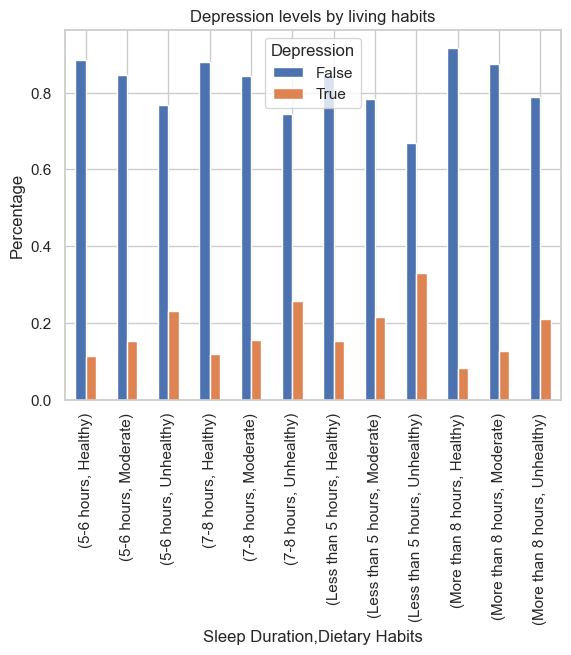

In [ ]:
life_factors_con.plot(kind='bar', stacked=False)
plt.title('Depression levels by living habits')
plt.ylabel('Percentage')
plt.show()

## How geographic variation impacts depression levels?

In [ ]:
df_test['City'].value_counts()

City
Kalyan           6591
Patna            5924
Vasai-Virar      5765
Kolkata          5689
Ahmedabad        5613
Meerut           5528
Ludhiana         5226
Pune             5210
Rajkot           5207
Visakhapatnam    5176
Srinagar         5074
Mumbai           4966
Indore           4872
Agra             4684
Surat            4636
Varanasi         4606
Vadodara         4568
Hyderabad        4496
Kanpur           4398
Jaipur           4328
Thane            4289
Lucknow          4280
Nagpur           4209
Bangalore        4123
Chennai          4044
Ghaziabad        3620
Delhi            3593
Bhopal           3475
Faridabad        3268
Nashik           3144
unknown            96
Gurgaon             1
Morena              1
Name: count, dtype: int64

In [ ]:
valid_cities = [
    "Kalyan","Patna","Vasai-Virar","Kolkata","Ahmedabad","Meerut","Ludhiana","Pune","Rajkot",
    "Visakhapatnam","Srinagar","Mumbai","Indore","Agra","Surat","Varanasi","Vadodara","Hyderabad",
    "Kanpur","Jaipur","Thane","Lucknow","Nagpur","Bangalore","Chennai","Ghaziabad","Delhi","Bhopal",
    "Faridabad","Nashik","Morena","Gurgaon"
]

df_test['City'] = df_test['City'].where(df_test['City'].isin(valid_cities), 'unknown')

In [ ]:
depression_by_city = pd.crosstab(
    df_test['City'],
    df_test['Depression']
)

display(depression_by_city)

Depression,False,True
City,,
Agra,3783,901
Ahmedabad,4390,1223
Bangalore,3399,724
Bhopal,2667,808
Chennai,3258,786
Delhi,2904,689
Faridabad,2788,480
Ghaziabad,2914,706
Gurgaon,1,0


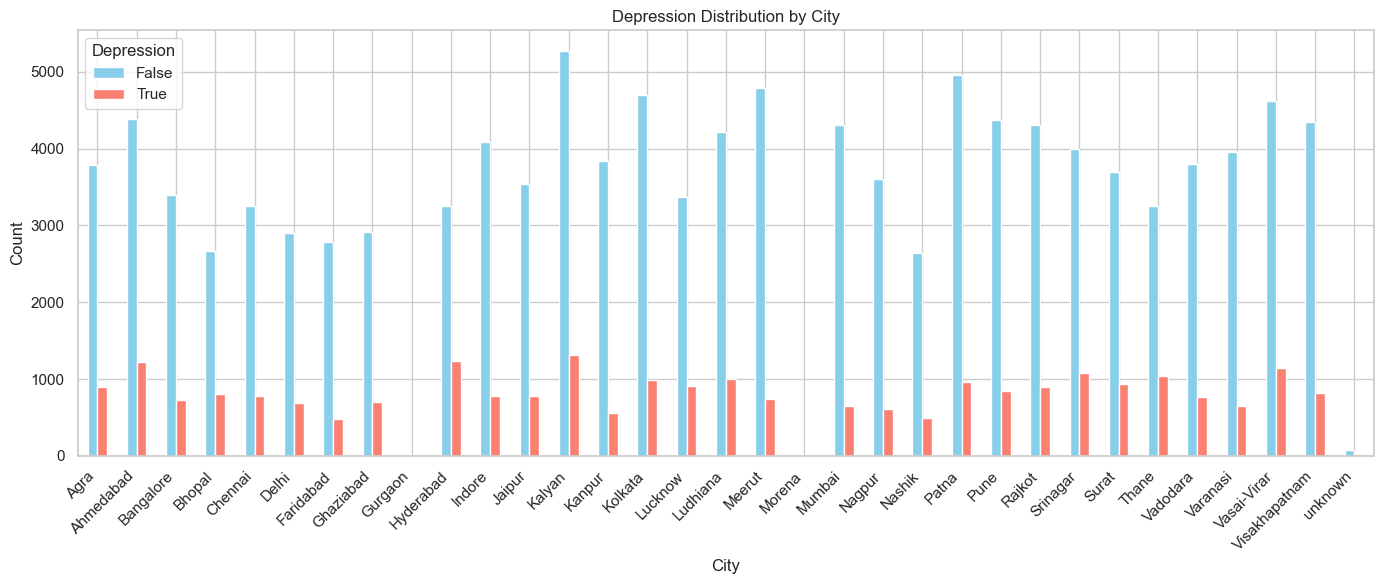

In [ ]:
depression_by_city.plot(
    kind="bar",
    figsize=(14,6),
    color={'False':"skyblue", 'True':"salmon"}
)

plt.title("Depression Distribution by City")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Depression")
plt.tight_layout()
plt.show()

## How does gender affect depression levels?

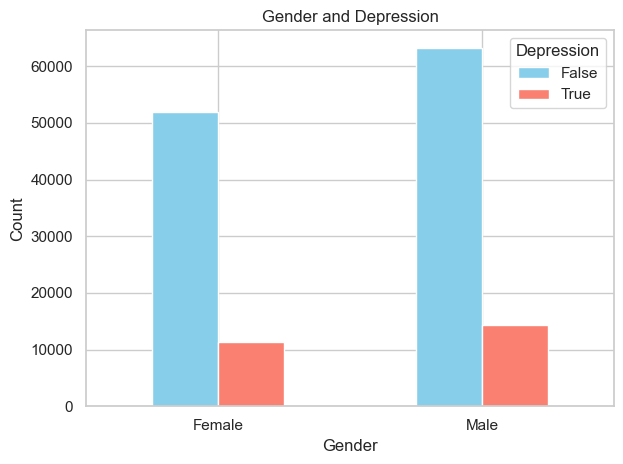

In [ ]:
gender_depression = pd.crosstab(
    df_test['Gender'],
    df_test['Depression']
)

gender_depression.plot(
    kind='bar',
    color = {'False': 'skyblue', 'True': 'salmon'}
)

plt.title('Gender and Depression')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Depression')
plt.tight_layout()
plt.show()

## Numerical Feature Distributions vs Depression

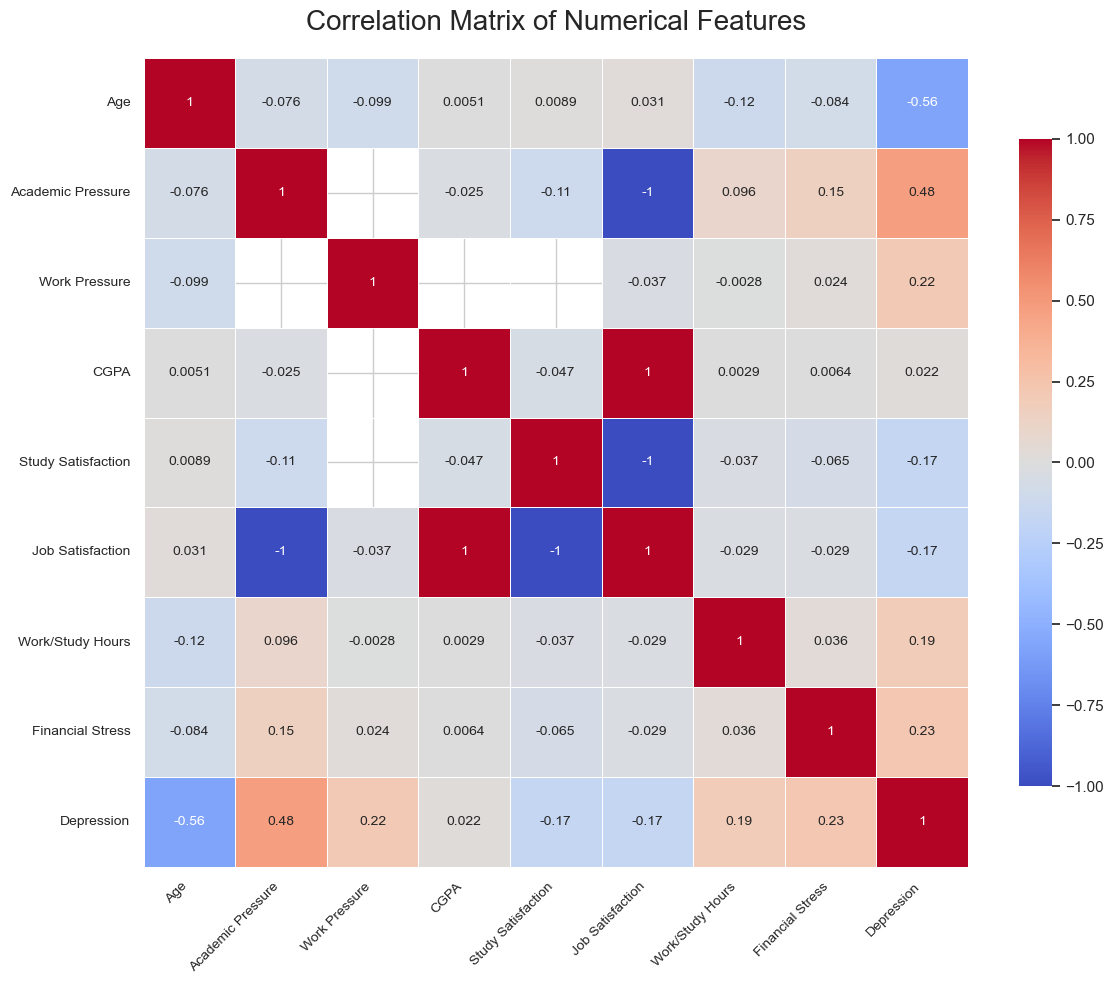

In [ ]:
# Correlation matrix on numerical features
corr = df[numeric_cols + ['Depression']].corr()
depression_correlations = corr['Depression'].sort_values(ascending=False)
depression_correlations = depression_correlations.drop('Depression')

import seaborn as sns
import matplotlib.pyplot as plt
# Visualize the correlation
plt.figure(figsize=(12,10))

sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    vmin=-1, vmax=1,
    linewidths=0.5,
    annot_kws={"size": 10},
    cbar_kws={"shrink": 0.8}
)
plt.title('Correlation Matrix of Numerical Features', fontsize=20, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## How relevant is Age with depression?

<function matplotlib.pyplot.show(close=None, block=None)>

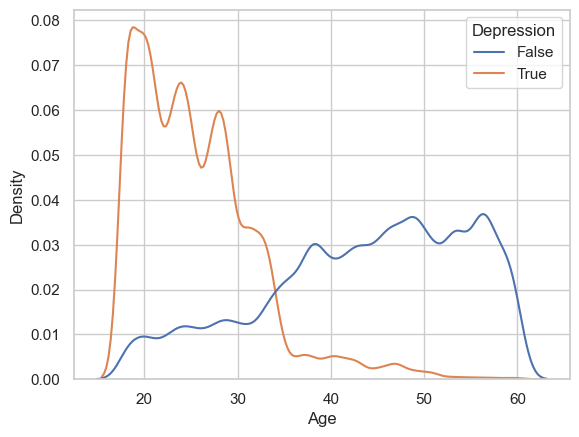

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(
    data=df_test,
    x='Age',
    hue='Depression',
    common_norm=False
)

plt.show

In [ ]:
import itertools
from scipy.stats import chi2_contingency

def combo_chi2_scores(
        df_test,
        categorical_cols,
        target='Depression',
        max_combo=4,
        top_k=10
):
    results=[]

    for r in range (1, max_combo + 1):
        for cols in itertools.combinations(categorical_cols, r):
            combo = df_test[list(cols)].astype(str).agg('_'.join, axis=1)
            confusion = pd.crosstab(
                combo,
                df_test[target]
            )


            if confusion.shape[0] > 1:
                chi2, p, dof, expected = chi2_contingency(confusion)
                results.append({
                    "combo" : cols,
                    "chi2" : chi2,
                    "p_value" : p,
                    "dof" : dof,
                    "n_levels" : confusion.shape[0]
                })
    results_df = pd.DataFrame(results)
    return results_df.sort_values(by='chi2', ascending=False).head(top_k)

top_combos = combo_chi2_scores(
    df_test,
    categorical_cols,
    target='Depression',
    max_combo=4,
    top_k=20
)

display(top_combos)

,combo,chi2,p_value,dof,n_levels
207,"(City, Profession, Degree, Have you ever had suicidal thoughts ?)",69455.796823,0.0,15257,15258
205,"(City, Profession, Dietary Habits, Have you ever had suicidal thoughts ?)",66342.568016,0.0,6555,6556
202,"(City, Profession, Sleep Duration, Have you ever had suicidal thoughts ?)",66023.133486,0.0,8665,8666
197,"(City, Working Professional or Student, Degree, Have you ever had suicidal thoughts ?)",65908.057399,0.0,3399,3400
236,"(Working Professional or Student, Dietary Habits, Degree, Have you ever had suicidal thoughts ?)",65335.764005,0.0,453,454
225,"(Working Professional or Student, Profession, Dietary Habits, Have you ever had suicidal thoughts ?)",65075.517449,0.0,302,303
246,"(Profession, Dietary Habits, Degree, Have you ever had suicidal thoughts ?)",64850.707900,0.0,2195,2196
241,"(Profession, Sleep Duration, Dietary Habits, Have you ever had suicidal thoughts ?)",64343.986819,0.0,972,973
188,"(City, Working Professional or Student, Profession, Have you ever had suicidal thoughts ?)",64342.712791,0.0,2342,2343
227,"(Working Professional or Student, Profession, Degree, Have you ever had suicidal thoughts ?)",64294.931279,0.0,1100,1101


In [ ]:
# Compute Cramer's V for each combo.
def cramers_v(top_combos, total_rows, target_classes=2):
    results = []
    for index, row in top_combos.iterrows():
        chi2 = row['chi2']
        n = total_rows
        r = row['n_levels']
        k = target_classes
        min_dim = min(r - 1, k - 1)

        # Calculated Cramer's V
        if min_dim == 0:
            v = 0
        else: 
            v = np.sqrt(chi2 / (n * min_dim))

        results.append({
            'combo': row['combo'],
            'chi2': chi2,
            'cramers_v': v,
            'p_value': row['p_value']
        })

    return pd.DataFrame(results).sort_values(by='cramers_v', ascending=False)

total_rows = len(df_test)
cramer_results = cramers_v(top_combos, total_rows, target_classes=2)

display(cramer_results)

,combo,chi2,cramers_v,p_value
0,"(City, Profession, Degree, Have you ever had suicidal thoughts ?)",69455.796823,0.702598,0.0
1,"(City, Profession, Dietary Habits, Have you ever had suicidal thoughts ?)",66342.568016,0.686672,0.0
2,"(City, Profession, Sleep Duration, Have you ever had suicidal thoughts ?)",66023.133486,0.685016,0.0
3,"(City, Working Professional or Student, Degree, Have you ever had suicidal thoughts ?)",65908.057399,0.684419,0.0
4,"(Working Professional or Student, Dietary Habits, Degree, Have you ever had suicidal thoughts ?)",65335.764005,0.681441,0.0
5,"(Working Professional or Student, Profession, Dietary Habits, Have you ever had suicidal thoughts ?)",65075.517449,0.680083,0.0
6,"(Profession, Dietary Habits, Degree, Have you ever had suicidal thoughts ?)",64850.707900,0.678907,0.0
7,"(Profession, Sleep Duration, Dietary Habits, Have you ever had suicidal thoughts ?)",64343.986819,0.676249,0.0
8,"(City, Working Professional or Student, Profession, Have you ever had suicidal thoughts ?)",64342.712791,0.676243,0.0
9,"(Working Professional or Student, Profession, Degree, Have you ever had suicidal thoughts ?)",64294.931279,0.675992,0.0
